In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

In [2]:
data_1=pd.read_csv('data_1.csv')

In [3]:
data_1

Frequency [MHz]   Weight   a: Tsky [K]   b: Tres1 [K]   c: Tres2 [K]  \
0          50.012207        0      0.000000       0.000000       0.000000   
1          50.402832        0      0.000000       0.000000       0.000000   
2          50.793457        0      0.000000       0.000000       0.000000   
3          51.184082        1   4645.468619      -0.034440      -0.099255   
4          51.574707        1   4556.501107       0.071895       0.021244   
..               ...      ...           ...            ...            ...   
123        98.059082        1    877.642853      -0.169377       0.006739   
124        98.449707        1    868.701882      -0.181803       0.018884   
125        98.840332        1    859.822813      -0.259145      -0.033581   
126        99.230957        0      0.000000       0.000000       0.000000   
127        99.621582        0      0.000000       0.000000       0.000000   

      d: Tmodel [K]   e: T21 [K]  
0          0.000000     0.000000  
1          0.000000     0.000000  
2          0.000000     0.000000  
3          0.000000    -0.099255  
4          0.000000     0.021244  
..              ...          ...  
123       -0.000103     0.006636  
124       -0.000068     0.018816  
125       -0.000044    -0.033625  
126        0.000000     0.000000  
127        0.000000     0.000000  

[128 rows x 7 columns]

In [4]:
freq=data_1.iloc[:,0]
T =data_1.iloc[:,-1]
model = data_1.iloc[:, -2]

In [5]:
def func (x, a,b,c,h):
    return -c*(1/(1+np.exp(-a*(x-h))))*(1/(1+np.exp(a*(x-b-h))))
# a is the magnitude of depth
#b is the width of depth
#c is a mulitiplication
#h is the horizontal place of depth


def gaussian (x,a,b,h):
    return a*np.exp(-((a-h)/(2*b))**2)

def chisquare (fobs,fexp):
    return np.sum((fobs-fexp)**2)

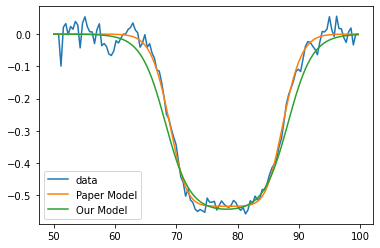

In [6]:
plt.plot(freq, T, label='data')
plt.plot(freq, model, label='Paper Model')
plt.plot(freq, func(freq,0.5,20,0.55,68.2), label='Our Model')
plt.legend()
plt.show()

In [7]:
def mcmc (max_steps, start_guess):
    #the step counter
    i = 0
    
    #definig the chain
    chain = np.empty(max_steps)
    chain[0] = start_guess
    
    #defining the chi-square
    chisq = np.empty(max_steps)
    chisq[0] = chisquare(func(freq,0.5,20,start_guess,68.2),T)
    
    #the chain 
    for i in range(1,max_steps):
        #
        new_c = normal(chain[i-1],0.005)
        new_chisq = chisquare(func(freq,0.5,20,new_c,68.2),T)
        
        #If chi-square gets big, we should do another step
        if new_chisq >= chisq[i-1]:
            prob = np.exp(-0.5*(new_chisq-chisq[i-1]))
            if np.random.rand() >= prob:
                chisq[i] = new_chisq
                chain[i] = new_c
                
        #chi-square got small so we accept it
            else:
                chisq[i] = chisq[i-1]
                chain[i] = chain[i-1]
        else:
            chisq[i] = new_chisq
            chain[i] = new_c
            
    return chain, chisq

ch, cs = mcmc(1000, 0.55)

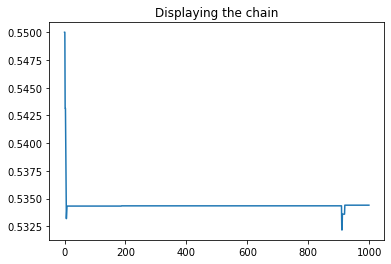

0.5343892627171515 0.0008335136088649449


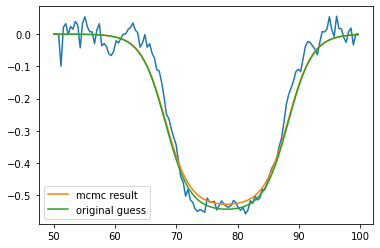

Chi squared of mcmc: 0.19621200891946922
Chi squared of original guess: 0.20625350218280913


In [8]:
plt.plot(ch)
plt.title("Displaying the chain")
plt.show()
mcmc_result = np.mean(ch)
print(mcmc_result, np.std(ch))

fig2 = plt.figure()
plt.plot(freq, T)
plt.plot(freq, func(freq,0.5,20,mcmc_result ,68.2), label="mcmc result")
plt.plot(freq, func(freq,0.5,20,0.55,68.2), label="original guess")
plt.legend()
plt.show()

print("Chi squared of mcmc:",chisquare(func(freq,0.5,20,mcmc_result,68.2),T))
print("Chi squared of original guess:",chisquare(func(freq,0.5,20,0.55,68.2),T))